In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import dataKey

In [41]:
all_questions = dataKey.retrieve_all_questions()
for i in all_questions.keys():
    print("#"+i+":\n"+all_questions[i].strip()+"\n")

#record_id:
Record ID

#ph_id2_2bf:
PromoteHealth ID Number:

#living_situation_before:
Before the pandemic, what was your living situation (spring 2020)?

#academic_work_hr_before:
Before the pandemic, how many hours per week, on average, did you spend on academic work during the semester?

#substances_before:
Before the lockdown, how frequently did you partake in any other recreational substances? (alcohol, marijuana, cocaine, heroin, ecstasy, amphetamines, etc.)?

#smokling_before:
Before the lockdown, how frequently did you used to smoke cigarettes, cigars, pipes, or e-cigarettes?

#healthy_before:
Before the pandemic, I tried to be healthy. For example, eating healthy, regularly going to the gym, taking/considering fitness classes, participating in recreational sports, etc.

#improve_spirit_before:
Before the pandemic, to improve my spirit, I engaged in activities such as hobbies, meditation, self-reflection, activities that make me happy, etc.

#current_living_in_us:
Are you curr

In [42]:
def create_result_histogram(field_name):
    df = pd.read_csv("processed_data.csv")
    try:
        question, answers = dataKey.retrieve_question_data(field_name)
    except Exception:
        question = field_name
    df[field_name].value_counts().plot.hist()
    plt.suptitle(question)

In [43]:
def create_result_bar(field_name):
    df = pd.read_csv("processed_data.csv")
    question, answers = dataKey.retrieve_question_data(field_name)
    print("Question:",question)
    for i in answers.keys():
        print(i+": "+answers[i])
    df[field_name] = df[field_name].apply(lambda x: answers[str(x)])
    df[field_name].value_counts().plot.bar()
    plt.suptitle(field_name)

In [78]:
def graph_side_by_side(field_name_1,field_name_2):
    df = pd.read_csv("processed_data.csv")
    label="cook"
    fig, axes = plt.subplots(1, 2, sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20, 6))

    
    axes[0].set_title(field_name_1)
    axes[1].set_title(field_name_2)
    axes[0].set_ylabel('Frequency')
    
    question_1, answers_1 = dataKey.retrieve_question_data(field_name_1)
    df[field_name_1] = df[field_name_1].apply(lambda x: answers_1[str(x)])    
    
    answer_order = list(answers_1.values())
    mapping = {day: i for i, day in enumerate(answer_order)}
    print(mapping)
    key = df[field_name_1].map(mapping)
    print(key)
    
    df[field_name_1].value_counts().plot.bar(y=label,ax=axes[0])
    
    question_2, answers_2 = dataKey.retrieve_question_data(field_name_2)
    df[field_name_2] = df[field_name_2].apply(lambda x: answers_2[str(x)])    
    df[field_name_2].value_counts().plot.bar(y=label,ax=axes[1]) 

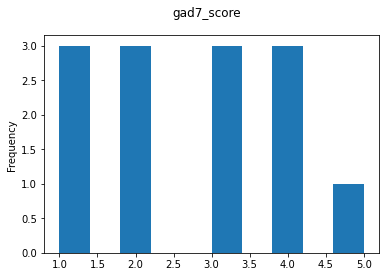

In [45]:
create_result_histogram("gad7_score")

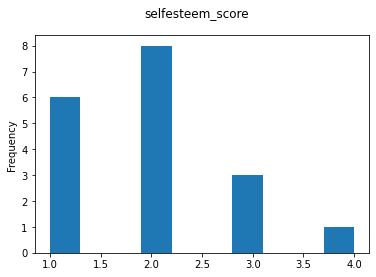

In [46]:
create_result_histogram("selfesteem_score")

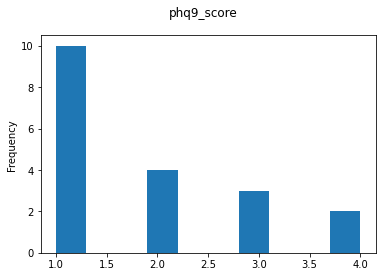

In [47]:
create_result_histogram("phq9_score")

Question: Have you or anyone in your immediate family, close friends, or significant other lost a job due to the COVID-19 pandemic? Or their employment have been negatively affected due to the COVID-19 pandemic?
1: Yes
2: No
3: I'm not sure


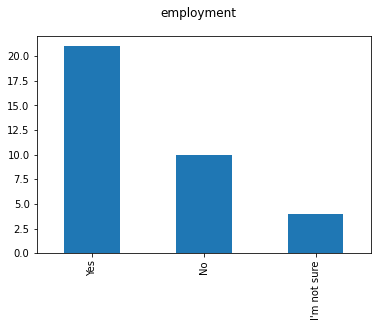

In [48]:
create_result_bar("employment")

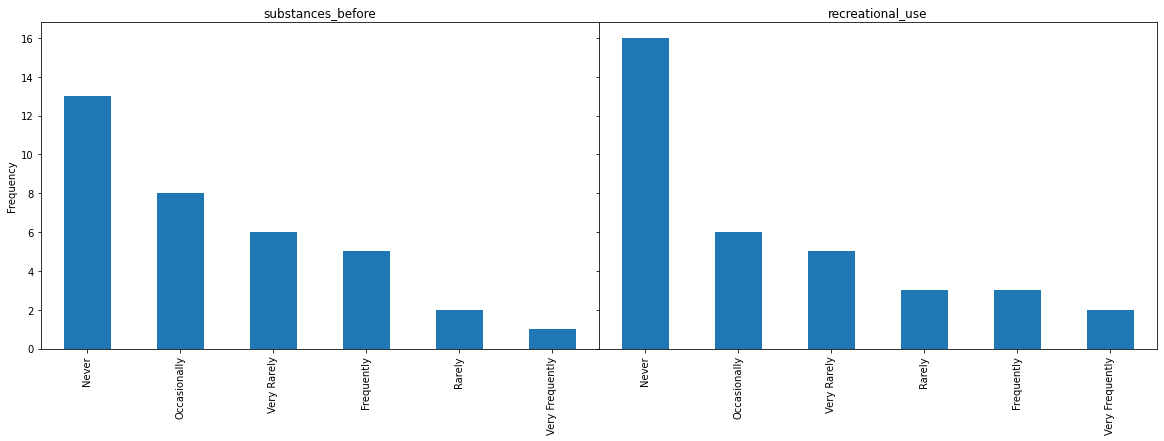

In [39]:
graph_side_by_side("substances_before","recreational_use")

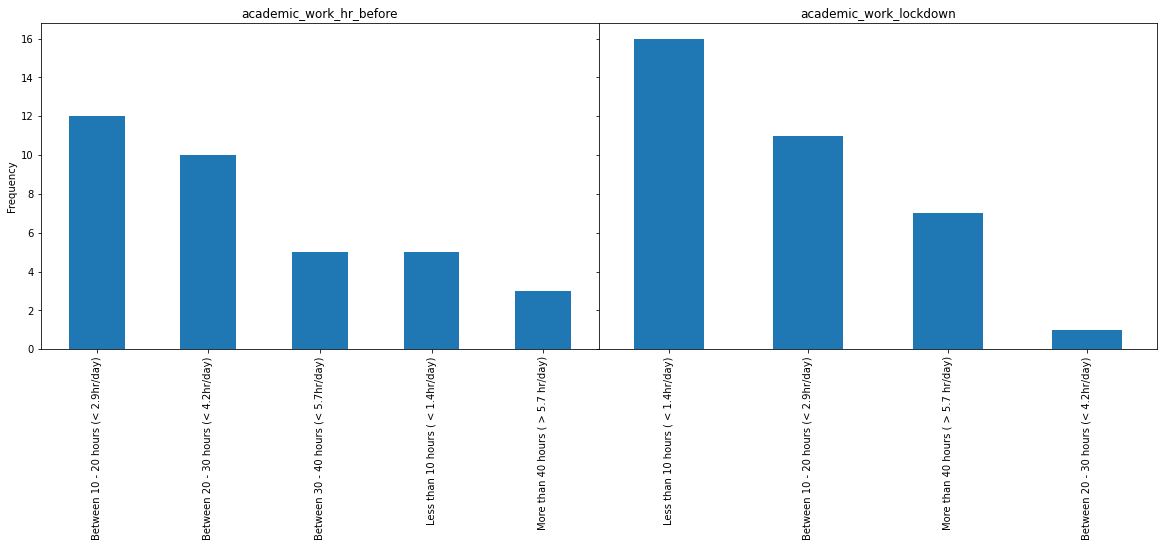

In [50]:
graph_side_by_side("academic_work_hr_before","academic_work_lockdown")

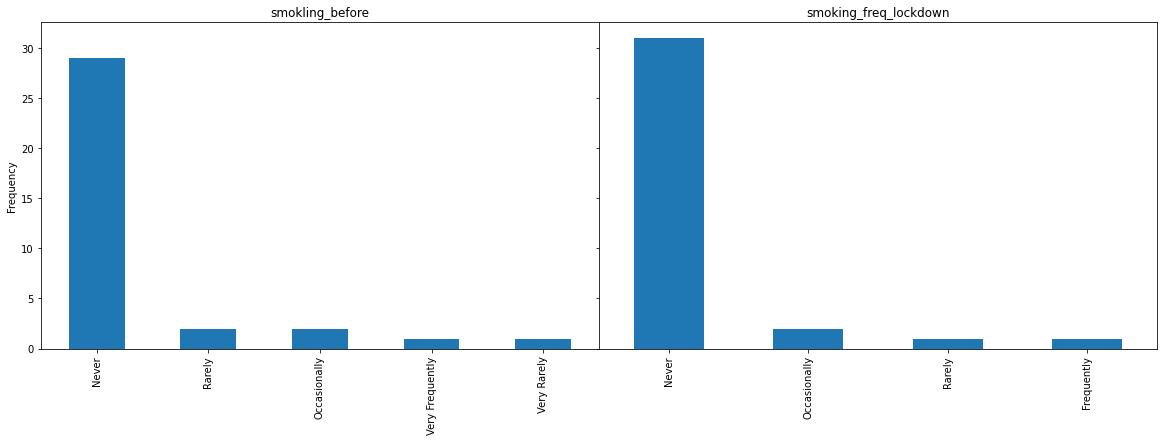

In [51]:
graph_side_by_side("smokling_before","smoking_freq_lockdown")

{'Very often': 0, 'Fairly often': 1, 'Sometimes': 2, 'Almost never': 3, 'Neve': 4}
0     2
1     3
2     2
3     3
4     2
5     3
6     1
7     2
8     1
9     1
10    1
11    0
12    4
13    2
14    1
15    1
16    1
17    3
18    0
19    1
20    1
21    1
22    1
23    1
24    0
25    0
26    0
27    1
28    1
29    0
30    2
31    2
32    1
33    0
34    1
Name: healthy_before, dtype: int64


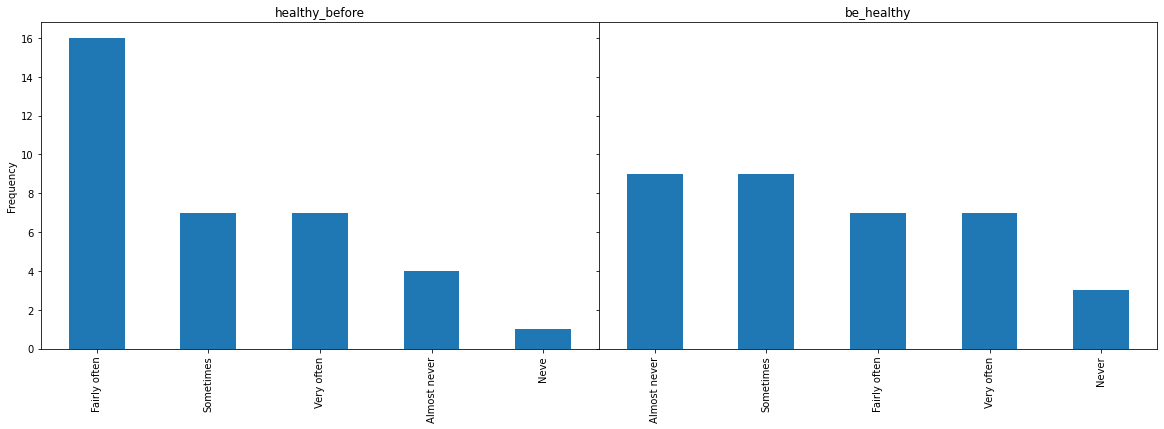

In [79]:
graph_side_by_side("healthy_before", "be_healthy")